In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv")
df.head()

,deneyim;maas
0,0.5;2500
1,0;2250
2,1;2750
3,5;8000
4,8;9000


In [3]:
df = pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv", sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


### Veriyi Görselleştir

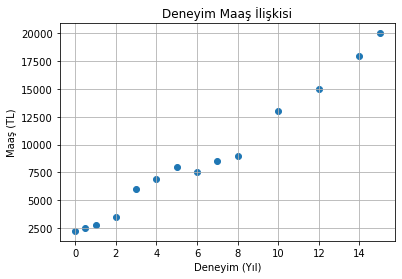

In [4]:
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [5]:
import seaborn as sbn

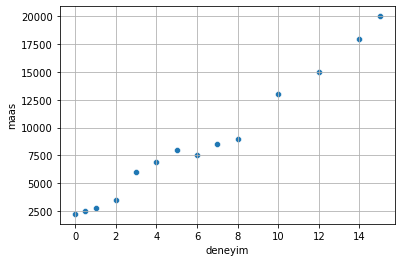

In [6]:
sbn.scatterplot(x="deneyim", y="maas", data=df)
plt.grid(True)

#Görselleştirmemizden yola çıkarak bizim bu data
#setine doğrusal reg. uygulayabileceğimiz kanısı doğrudur

### Doğrusal Regresyon Modeli Eğitimi

In [7]:
linear_reg = LinearRegression()

x = df.deneyim.values.reshape(-1, 1)
y = df.maas.values.reshape(-1, 1)

linear_reg.fit(x,y)

#x ve y deki değerleri reshape ederek sklearn ün istediği
#numpy formuna çevirmiş olduk

LinearRegression()

In [8]:
y_ekseni_kesisim = np.array([0]).reshape(1, -1)
b0 = linear_reg.predict(y_ekseni_kesisim)
print("b0..:",b0) # bu da intercept buluyo. Alttaki kolay olan ama böyle de bulunabiliyor. Burada yapılan ilk degeri bulup predict ettirmek

b0_ = linear_reg.intercept_ #y eksenini kestigi nokta
print("b0_..:",b0_)

b1 = linear_reg.coef_ #eğim(slope) bulunması
print("b1..:",b1)
#0 yıl deneyimi olan biri 1663 tl alır ve her 1 yıl
#deneyim artışında 1138 tl maas artısı olur denmektedir
#maas = 1663 + 1138*deneyim

b0..: [[1663.89519747]]
b0_..: [1663.89519747]
b1..: [[1138.34819698]]


In [9]:
deneyim = 11

#1. yol
maas_yeni = 1663 + 1138*deneyim
print(maas_yeni)

#2. yol
sonuc = linear_reg.predict(np.array([deneyim]).reshape(1,-1))#Muhakkak np array a çevirmeliyiz
print(f"11 yıllık deneyime sahip birinin maaşı..:{sonuc[0]} TL")

14181
11 yıllık deneyime sahip birinin maaşı..:[14185.72536421] TL


### Basit Doğrusal Regresyon Modeli ile Test/Tahmin/Görselleştirme

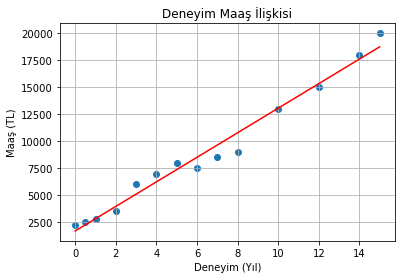

In [10]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1) #tahmin etmek istediğimiz deneyimler

plt.figure()
plt.scatter(x,y)

y_head = linear_reg.predict(array) #y_head maaşı verecektir

plt.plot(array, y_head, color="red") #(deneyim,maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

### Çoklu Doğrusal Regresyon

In [11]:
df = pd.read_csv("coklu_dogrusal_regresyon_veriseti_20220209.csv", sep=";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


<AxesSubplot:xlabel='deneyim', ylabel='maas'>

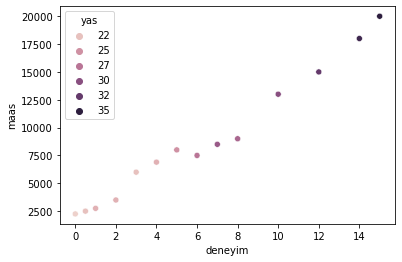

In [12]:
sbn.scatterplot(x = "deneyim", y = "maas", hue="yas", data=df)

In [13]:
x = df.iloc[:,[0,2]].values
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [14]:
y = df.maas.values.reshape(-1,1)
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

In [15]:
coklu_dogrusal_reg = LinearRegression()
coklu_dogrusal_reg.fit(x,y)

LinearRegression()

In [16]:
test_verisi1 = np.array([[10,35]]) #deneyim 10 ve yaş 35
test_sonucu1 = coklu_dogrusal_reg.predict(test_verisi1)
print("10 yıllık deneyim ve 35 yaş sonucu maaş {} TL".format(test_sonucu1[0]))

10 yıllık deneyim ve 35 yaş sonucu maaş [11046.35815877] TL


In [17]:
test_verisi1 = np.array([[5,35]]) #deneyim 5 ve yaş 35
test_sonucu1 = coklu_dogrusal_reg.predict(test_verisi1)
print("5 yıllık deneyim ve 35 yaş sonucu maaş {} TL".format(test_sonucu1[0]))

5 yıllık deneyim ve 35 yaş sonucu maaş [3418.85455609] TL


### Polinomsal Regresyon

> Değişkenler arasında doğrusal bir ilişki yoktur

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#polinomal veri üzerinde bilerek lineer de deneyelim dedik

In [19]:
df = pd.read_csv("polinomsal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [20]:
y = df.araba_max_hiz.values.reshape(-1,1)
x = df.araba_fiyat.values.reshape(-1,1)

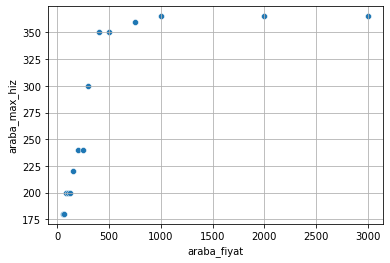

In [21]:
sbn.scatterplot(x = "araba_fiyat" , y="araba_max_hiz", data=df)
plt.grid(True)

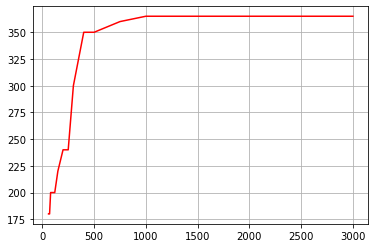

In [22]:
plt.plot(df.araba_fiyat, df.araba_max_hiz, color="red")
plt.grid(True)

In [23]:
#Doğrusal Reg İle
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

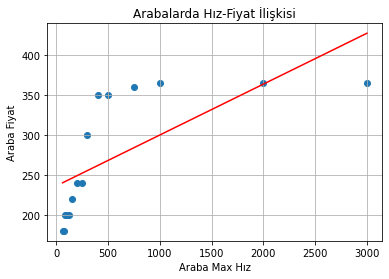

10 milyon TL lik araba hızı tahmini..:  [[871.66401826]]


In [24]:
y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x, y_tahmin, color="red")
plt.xlabel("Araba Max Hız")
plt.ylabel("Araba Fiyat")
plt.title("Arabalarda Hız-Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyat = 10000
print("10 milyon TL lik araba hızı tahmini..: ",lr.predict((np.array([araba_fiyat]).reshape(1,-1))))

In [25]:
#Polinomsal Regresyon İle
pol_reg = PolynomialFeatures(degree = 4) #Kaçıncı dereceden polinoma fit edeyim diye soruyor. Biz de 4 dedik  

x_polinom = pol_reg.fit_transform(x)
x_polinom #çıktılar sırasıyla b0 + b1*x + b2*x^2 + b3*x^3 + .. + bn*x^n -> n=4

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [26]:
lr2 = LinearRegression()
lr2.fit(x_polinom, y)

LinearRegression()

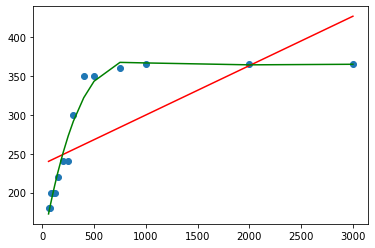

In [27]:
#tahmin 
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x, y_tahmin, color="red", label = "Doğrusal")
plt.plot(x, y_tahmin2, color="green", label = "Polinomsal")

### Regresyon Modellerinin Değerlendirilmesi
> R Kare : 
***Yüksek bir r^2 modelin daha çok uyumlu olduğunu gösterir***

In [28]:
from sklearn.metrics import r2_score

.respahe yazmadan önce belli bir array var onu baz alarak yeniden boyutlandırıyor(reshape) . eğer -1 yazıyorsa hepsini al anlamında yani boyutu 14 adet verimiz var ise reshape (-1,1) yazılırsa boyutu
(14,1) olacaktır

In [29]:
df = pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [30]:
linear_reg = LinearRegression()

x = df.deneyim.values.reshape(-1, 1)
y = df.maas.values.reshape(-1, 1)

linear_reg.fit(x,y)

LinearRegression()

In [31]:
pol_reg = PolynomialFeatures(degree = 2)

x_polinom = pol_reg.fit_transform(x)

poly_reg = LinearRegression()
poly_reg.fit(x_polinom, y)

LinearRegression()

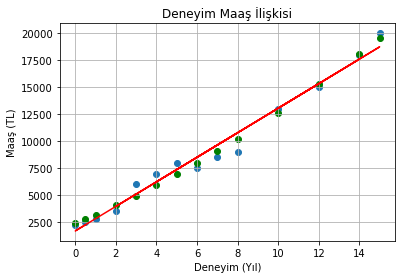

In [32]:
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim, df.maas)
plt.plot(x, y_tahmin_linear, color = "red", label="Doğrusal")
plt.scatter(x, y_tahmin_poly, color = "green", label="Polinomsal")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [33]:
print("Doğrusal Regresyon R^2..: {}".format(r2_score(y,y_tahmin_linear)))
print("Polinomsal Regresyon R^2..: {}".format(r2_score(y,y_tahmin_poly)))

Doğrusal Regresyon R^2..: 0.9775283164949902
Polinomsal Regresyon R^2..: 0.9854449464578782


### SINIFLANDIRMA

In [34]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='class', ylabel='count'>

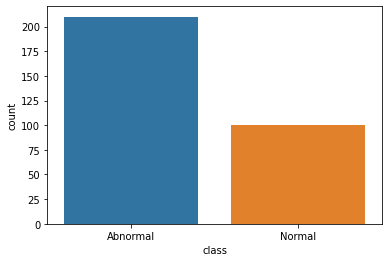

In [36]:
sns.countplot(data["class"])

In [37]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3) #class özelliğini numerik yaptık

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [39]:
y = data["class"].values
x_data = data.drop(["class"], axis=1)

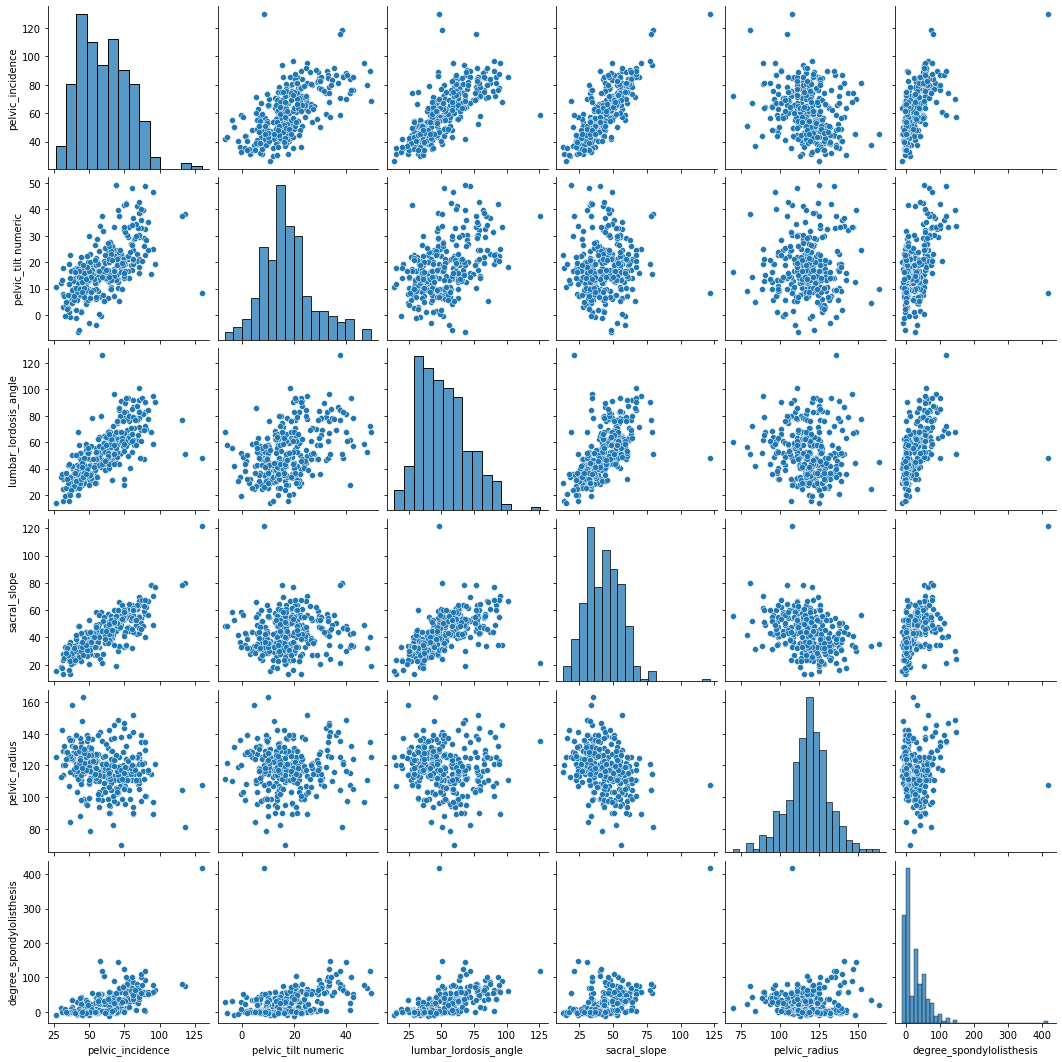

In [40]:
sns.pairplot(x_data)
plt.show()

#### Veriyi Normalize Etmek
> Xnorm = (x - min(x)) / (max(x) - min(x))
>   Böylece 0-1 arasına haritalarız

In [41]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [42]:
#Bir de standardizasyon deneyerek yapabilirsin

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)
#%15 i test e ayrıldı. random_state rastgele ayır demek.
#42 verirken de şu demektir: 42 bir çekirdek. Bunu verince rastgele seçimleri yapar ve tekrar çalıştırılması durumunda yine aynı test noktalarını seçer
#Böylece her çalıştırdığımızda farklı farklı test veri seti yerine aynı veri setini elde ederiz

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train..: ",x_train.shape)
print("x_test..: ",x_test.shape)
print("y_train..: ",y_train.shape)
print("y_test..: ",y_test.shape)

x_train..:  (6, 263)
x_test..:  (6, 47)
y_train..:  (263,)
y_test..:  (47,)


In [45]:
#Eğer transpoz etmemiş olsaydık mesela
#x_train 263 satır 6 sütundan oluşacaktı

#### Sklearn ile Hazır Lojistik Regresyon Modeli Kullanımı

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)

LogisticRegression()

In [48]:
test_dogrulugu = lr.score(x_test.T, y_test.T) #doğruluğu hesaplar
print(f"Test Doğruluğu..: {test_dogrulugu}")

Test Doğruluğu..: 0.7872340425531915


#### k-En Yakın Komşu

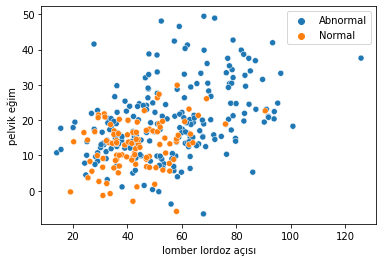

In [49]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
sns.scatterplot(x="lumbar_lordosis_angle", y="pelvic_tilt numeric", data=data, hue="class")
plt.xlabel("lomber lordoz açısı")
plt.ylabel("pelvik eğim")
plt.legend()

#knn de bir nokta yakınındaki noktaları bulmaya çalışırken öklid metriğini kullanır
#Ayrıca her noktaya tek tek bakmaz. Yoksa yavaş olur. Belirli bir alanı tarar
#Ama bunlar değiştirilebilirler

In [50]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]

In [51]:
y = data["class"].values
x_data = data.drop(["class"], axis = 1)

In [52]:
#Normalizasyon
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors=komsu_sayisi)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
print(f"{komsu_sayisi} En Yakın Komşu Modeli Test Doğruluğu..: {knn.score(x_test, y_test)}")

4 En Yakın Komşu Modeli Test Doğruluğu..: 0.6382978723404256


#### En iyi K Değerinin Bulunması

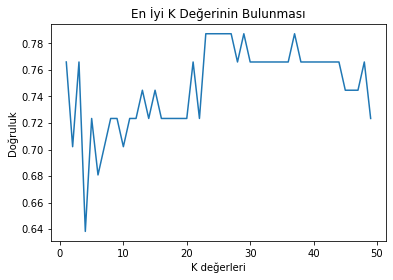

In [55]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,50), score_list)
plt.xlabel("K değerleri")
plt.ylabel("Doğruluk")
plt.title("En İyi K Değerinin Bulunması")
plt.show()
#Veri seti küçük olduğu için 50 ye kadar tek tek k değerlerini denettik

In [56]:
#Buna göre k değeri30 lu civarlarda iyi sonuç veriyor

#### Destek Vektör Makinesi

2 grubu da dikenli tel gibi çevrelersek(bu alanı max yapacak şekilde) Bu alanın 2 tarafını da eşit bölecek şekilde bir çizgi ile böleriz. Böylecebu çizginin tarafına göre yeni gelen noktaları sınıflarız

In [57]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values
x_data = data.drop(["class"], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [58]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

print("Destek vektör Makinesi Modeli Test Doğruluğu..: {}".format(svm.score(x_test,y_test)))

Destek vektör Makinesi Modeli Test Doğruluğu..: 0.7872340425531915


#### Karar Ağacı

In [59]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values
x_data = data.drop(["class"], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Karar Ağacı Modeli Test Doğruluğu..:{}".format(dt.score(x_test, y_test)))

Karar Ağacı Modeli Test Doğruluğu..:0.8085106382978723


#### Rastgele Orman
> Birden fazla karar ağacının veridği kararlar oylanır ve buna göre karar verilir

In [61]:
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values
x_data = data.drop(["class"], axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [62]:
from sklearn.ensemble import RandomForestClassifier
#random forest bir topluluk(ensemble) öğrenmesi olduğundan ensemble kısmının içinde

rf =  RandomForestClassifier(n_estimators = 100, random_state=1)
#100 tane ağaç oluşturulsun

rf.fit(x_train, y_train)
print("Rastgele Orman Modeli Test Doğruluğu..: {}".format(rf.score(x_test, y_test)))


Rastgele Orman Modeli Test Doğruluğu..: 0.8723404255319149


### Sınıflandırma Modellerinin Değerlendirilmesi

    1.Doğruluk..:Şimdiye kadar yaptığmız örneklerdeki doğruluk dediğimiz şeydir.
    2.Karışıklık Matrisi..:Ml ve özellikle istatistiksel sınıflandırma probleminde, hata matrisi olarak da bilinen bir karışıklık matrisi, bir algoritmanını performansının, tipik olarak denetimli bir öğrenmenin görselleştirilmesine izin veren özel bir tablodur
    
              Gerçek Sınıf
              ------------
              Kedi | Köpek
TahminSınıfı|  Kedi   5   -------    2

          Köpek 3     3
          
#Burada accuracy 8/13 olur. 13 tanesi içerisinde 8 ini bildik

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  3],
       [ 3, 27]], dtype=int64)

In [64]:
#14 defa normal e normal demiş
#3 defa normale anormal(abnormal) demiş
#27 defa anormale anormal demiş
#3 defa da anormale normal demiş

Text(24.0, 0.5, 'y_true')

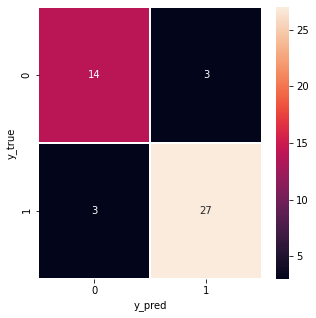

In [65]:
#Isı haritası ile confusion matrix
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="white", fmt=".0f")
plt.xlabel("y_pred")
plt.ylabel("y_true")

In [66]:
#f-measure dengesiz verilerle alakalı güzel bir tespit edici 
#Buna ait bkz. Ders9 1.05.00 veya slaytlar.

In [67]:
#Sadece soğruluk oranına bakmak yanıltıcı olabilir.
#Bu yüzden ROC Eğrisi metriği daha etkili olabilmektedir

In [68]:
#AUC, ROC eğrisini oluşturduktan sonra eğrinin altında (üstünde de demi olabilir)
#alana bakar. Gerçekten çok iyi bir metriktir.

> Sonuç: 
  1. Karar verici çalışmalarda, önerilen yöntemin(ve varsa alternatiflerinin) ROC eğrileri elde edilmelidir
  2. Kara verme işleminde "Duyarlılık" ve "Belirlilik" kriterlerinden hangisinin daha kritik olduğuna karar verilmelidir
  3. Önerilen yöntemin eşik değeri buna göre belirlenmelidir

### KÜMELEME

### K-Ortalama Kümeleme

In [69]:
#Veri seti oluştur

#küme 1
x1 = np.random.normal(25,5,1000)#normal dağılıma uyan 25 ortalamalı, 5 standart sapmalı 1000 nokta
y1 = np.random.normal(25,5,1000)

#küme 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

#küme 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0) #concatenate=uç uca ekle

dictionary = {"x":x, "y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,17.293055,30.378917
1,24.200444,26.036836
2,28.999905,17.714363
3,28.696336,25.979691
4,22.902642,26.486427


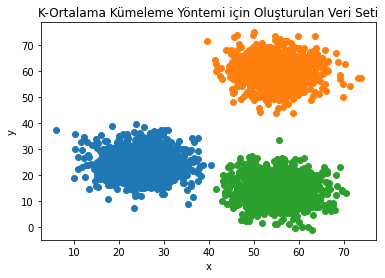

In [70]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

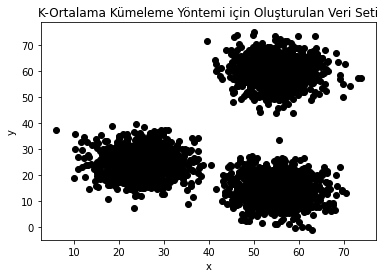

In [71]:
#algoritma yukarıdaki gibi renkli değil, verileri şu şekilde görecektir
plt.figure()
plt.scatter(x1,y1, color="black")
plt.scatter(x2,y2, color="black")
plt.scatter(x3,y3, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

#### k Değerinin Seçimi

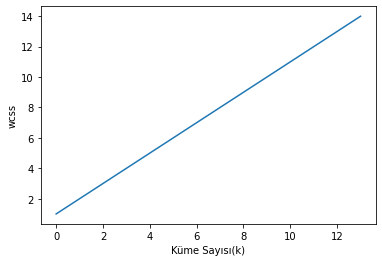

In [72]:
from sklearn.cluster import KMeans
wcss = [] #uygun k değerini bulmak için kullaıcaz

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,15))

plt.xlabel("Küme Sayısı(k)")
plt.ylabel("wcss")
plt.show()
    #Burada train test yok çünkü bunlar gözetimsiz öğrenme

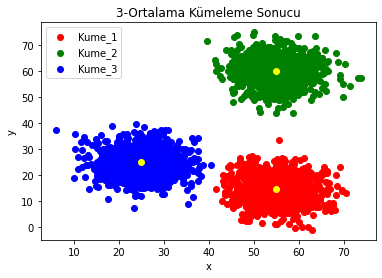

In [73]:
k_ortalama = KMeans(n_clusters=3)
kumeler = k_ortalama.fit_predict(data)

data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color="red", label="Kume_1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color="green", label="Kume_2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color="blue", label="Kume_3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color = "yellow")
#cluster center = öbek merkezleri 0sütunu x , 1. sütun y değerleriymiş
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

### Hiyerarşik Kümeleme 
#### Hiyerarşik Kümeleme Nedir?
--Hiyerarşik kümeleme, bir küme hiyerarşisi oluşturmaya çalışan küme analizi yöntemdir. <br> --Hiyerarşik kümeleme stratejileri şöyledir
   1. Aglomeratif: "Aşağıdan yukarıya" bir yaklaşımdır. Her gözlem kendi kümesi ile başlar ve hiyerarşide yukarıya çıktıkça küme çiftleri birleşir
   2. Bölücü: "Yukarıdan aşağıya". Tüm gözlemler tek kümede başlar ve bölmeler, hiyerarşide aşağı doğru ilerlerken yinelemeli olarak gerçekleştirilir

In [74]:
#Veri seti oluştur

#küme 1
x1 = np.random.normal(25,5,20)
y1 = np.random.normal(25,5,20)

#küme 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

#küme 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0)

dictionary = {"x":x, "y":y}
data = pd.DataFrame(dictionary)
data.head(3)

,x,y
0,22.243308,25.587443
1,16.066936,31.557880
2,24.458690,21.635676


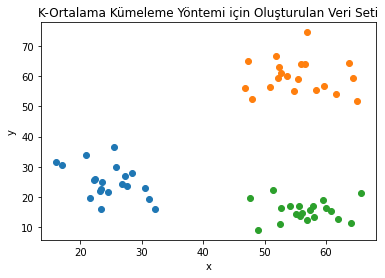

In [75]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

#### Dendrogram Gösterimi

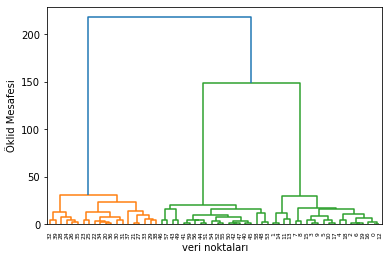

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method="ward")#bağlaşımları ward ile oluştur. Bu teknikle kim kim yakım diye bir salkım oluşturulur. Bunu da dendrogram ile birleştirirz
dendrogram(merg, leaf_rotation=90) # 90 demeseydik yukarıdan aşağıya değil de soldan sağa bir şey olurdu
plt.xlabel("veri noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

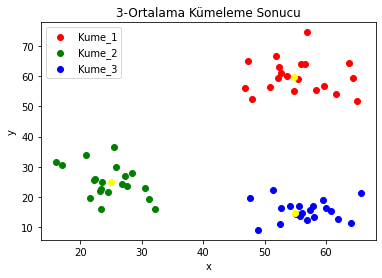

In [79]:
from sklearn.cluster import AgglomerativeClustering

hiyerarsi_kume = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage="ward")#bana 3 küme bul ve bunların aralarındaki mesafeyi öklid alg ile hesapla. Bağlanma işini ward ile yap
kume = hiyerarsi_kume.fit_predict(data)

data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color="red", label="Kume_1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color="green", label="Kume_2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color="blue", label="Kume_3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color = "yellow")
#cluster center = öbek merkezleri 0sütunu x , 1. sütun y değerleriymiş
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

In [80]:
#linkage ward:birleştirilen öbeklerin varyansını minimize ederek birleştirir
#linkage average: birleştirme yaparken her öbekler arası ortalama uzaklığa bakar